In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
counts_synth = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/simu_debug/counts.st_synth.csv")

In [3]:
counts_synth.head()

,Unnamed: 0,RP11-34P13.7,FO538757.3,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,LINC00115,FAM41C,...,GRXCR1,RP11-63A1.2,CTD-2514K5.4,RP11-112L7.1,RP11-231G15.2,RP11-983C2.3,LINC00919,RP11-589P10.7,KRTAP9-2,IGLVIV-66-1
0,exper0_location_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exper0_location_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,exper0_location_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,exper0_location_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,exper0_location_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
counts_synth.shape

(2500, 29734)

In [8]:
members_synth = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/simu_debug/members.st_synth.csv")

In [9]:
members_synth.head()

,Unnamed: 0,CAFs,Cancer Epithelial,Myeloid,Normal Epithelial,T-cells
0,exper0_location_0,3,0,0,2,0
1,exper0_location_1,3,0,0,0,3
2,exper0_location_2,1,0,0,0,6
3,exper0_location_3,0,0,0,0,8
4,exper0_location_4,0,0,0,0,7


In [10]:
members_synth.shape

(2500, 6)

In [ ]:
# maybe I shouldn't use 12 cell types

In [11]:
proportions_synth = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/simu_debug/proportions.st_synth.csv")

In [12]:
proportions_synth.head()

,Unnamed: 0,CAFs,Cancer Epithelial,Myeloid,Normal Epithelial,T-cells
0,exper0_location_0,0.600000,0.0,0.0,0.4,0.000000
1,exper0_location_1,0.500000,0.0,0.0,0.0,0.500000
2,exper0_location_2,0.142857,0.0,0.0,0.0,0.857143
3,exper0_location_3,0.000000,0.0,0.0,0.0,1.000000
4,exper0_location_4,0.000000,0.0,0.0,0.0,1.000000


In [14]:
proportions_synth.shape

(2500, 6)

In [15]:
signature_synth = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/simu_debug/signature.st_synth.csv")

In [17]:
signature_synth.shape

(159, 5)

In [19]:
signature_synth.tail(
)

,CAFs,Cancer Epithelial,Myeloid,Normal Epithelial,T-cells
154,NaN,NaN,NaN,NaN,XCL2
155,NaN,NaN,NaN,NaN,YPEL5
156,NaN,NaN,NaN,NaN,ZFP36L2
157,NaN,NaN,NaN,NaN,ZNF683
158,NaN,NaN,NaN,NaN,NaN


In [20]:
breast_data = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/bc_signatures_version_1013.csv")

In [22]:
breast_data

,Basal,LumA,LumB,MBC,Normal epithelial,Tcm,Tem,Tfh,Treg,Activated CD8,...,Plasmablasts,MDSC,Monocytes,cDC,pDC,CAFs MSC iCAF-like,CAFs myCAF-like,PVL differentiated,PVL immature,Endothelial
0,EMP1,SH3BGRL,UGCG,COL11A2,KRT14,CCR7,IL7R,CXCL13,TNFRSF4,CD69,...,IGKV3-15,ITGAM,LYZ,CD80,IL3RA,APOD,COL1A1,ACTA2,CCL19,ACKR1
1,TAGLN,HSPB1,ARMT1,SDC1,KRT17,LTB,ANXA1,NMB,LTB,CCR7,...,IGHG1,CD33,IL1B,CD86,LILRA4,DCN,COL1A2,TAGLN,RGS5,FABP4
2,TTYH1,PHGR1,ISOC1,FBN2,LTF,IL7R,CXCR4,NR3C1,IL32,CD27,...,IGKV1-5,ARG1,G0S2,CCR7,CD123,PTGDS,COL3A1,MYL9,IGFBP7,PLVAP
3,RTN4,SOX9,GDF15,MMP1,KRT15,SARAF,KLRB1,DUSP4,BATF,BTLA,...,IGKV3-20,NOS2,TYROBP,CD1A,TCF4,CFD,LUM,TPM2,NDUFA4L2,RAMP2
4,TK1,CEBPD,ZFP36,FABP5,PTN,SELL,TNFAIP3,TNFRSF18,FOXP3,CD40LG,...,IGKV3-11,CD68,FCN1,CD1C,IRF7,LUM,SFRP2,NDUFA4L2,CCL2,VWF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,FDCSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NLRP3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,HLA.DPB1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,CTSH,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,PCSK1N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,IER3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,C4orf48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
breast_data.shape

(89, 29)

In [25]:
adata_h5ad = sc.read("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/CID44971_TNBC.h5ad")

In [26]:
adata_h5ad

AnnData object with n_obs × n_vars = 1162 × 19237
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: '_index', 'features'

In [30]:
adata_h5ad.obs

,orig.ident,nCount_RNA,nFeature_RNA
AACATTGGTCAGCCGT-1,0,751.0,553
CATCGAATGGATCTCT-1,0,2831.0,1351
CGGGTTGTAGCTTTGG-1,0,15428.0,4496
CCTAAGTGTCTAACCG-1,0,889.0,621
TCTGTGACTGACCGTT-1,0,7637.0,3009
...,...,...,...
TGCAGTGGTAGGGAAC-1,0,4513.0,2364
AGCGAGACGTGAAGGC-1,0,8749.0,3583
CAGTGTTAATCTCTCA-1,0,2634.0,1680
GATCGCTGTGGTGCGT-1,0,4655.0,2386


In [32]:
adata_h5ad.var

,_index,features
0,AL627309.1,AL627309.1
1,AL669831.5,AL669831.5
2,LINC00115,LINC00115
3,FAM41C,FAM41C
4,AL645608.1,AL645608.1
...,...,...
19232,AC007325.4,AC007325.4
19233,AC007325.2,AC007325.2
19234,AL354822.1,AL354822.1
19235,AC004556.1,AC004556.1


In [33]:
adata_meta = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/CID44971_metadata.csv")

In [34]:
adata_meta

,Unnamed: 0,nCount_RNA,nFeature_RNA,subtype,patientid,Classification
0,AACATTGGTCAGCCGT-1,751,553,TNBC,CID44971,Normal + stroma + lymphocytes
1,CATCGAATGGATCTCT-1,2831,1351,TNBC,CID44971,Normal + stroma + lymphocytes
2,CGGGTTGTAGCTTTGG-1,15428,4496,TNBC,CID44971,Normal + stroma + lymphocytes
3,CCTAAGTGTCTAACCG-1,889,621,TNBC,CID44971,Normal + stroma + lymphocytes
4,TCTGTGACTGACCGTT-1,7637,3009,TNBC,CID44971,Normal + stroma + lymphocytes
...,...,...,...,...,...,...
1157,TGCAGTGGTAGGGAAC-1,4513,2364,TNBC,CID44971,Invasive cancer + lymphocytes
1158,AGCGAGACGTGAAGGC-1,8749,3583,TNBC,CID44971,Invasive cancer + lymphocytes
1159,CAGTGTTAATCTCTCA-1,2634,1680,TNBC,CID44971,Invasive cancer + lymphocytes
1160,GATCGCTGTGGTGCGT-1,4655,2386,TNBC,CID44971,Invasive cancer + lymphocytes


In [39]:
adata_count_matrix = sc.read_mtx("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/scrna/count_matrix_sparse.mtx")

In [42]:
adata_count_matrix

<bound method AnnData.to_df of AnnData object with n_obs × n_vars = 29733 × 7986>

In [44]:
sc.pp.pca(adata_count_matrix)

In [43]:
sc.pp.neighbors(adata_count_matrix)

/Users/nicholasdjedjos/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 7986 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/nicholasdjedjos/miniconda3/envs/simulation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


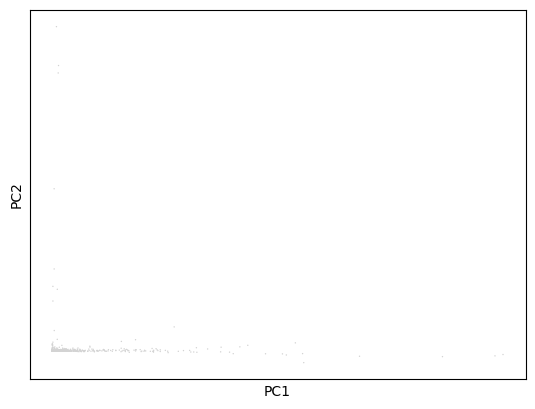

In [47]:
sc.pl.pca(adata_count_matrix)

In [48]:
sc.tl.umap(adata_count_matrix)

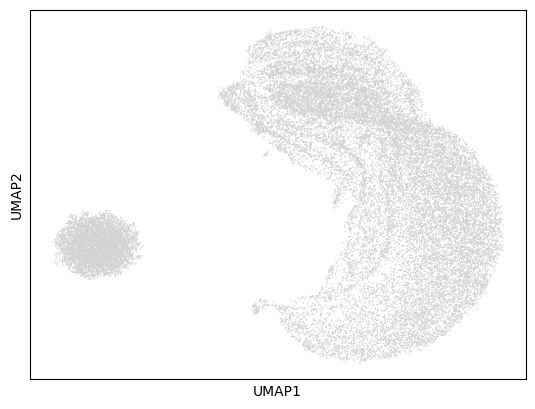

In [49]:
sc.pl.umap(adata_count_matrix) # only 7986 barcodes?

In [96]:
adata_count_matrix_meta = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/scrna/metadata_sf.csv")

In [101]:
adata_count_matrix_meta.head()

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,subtype,celltype_subset,celltype_minor,celltype_major
0,CID44971_AAGCCGCCACGCATCG,CID44971,3409,1492,9.416251,TNBC,Endothelial,Endothelial ACKR1,Endothelial
1,CID44971_AAGGAGCTCAACACAC,CID44971,11133,3386,6.557083,TNBC,Endothelial,Endothelial ACKR1,Endothelial
2,CID44971_ACGAGCCTCCGATATG,CID44971,2119,1021,9.815951,TNBC,Endothelial,Endothelial ACKR1,Endothelial
3,CID44971_ACGTCAATCCGAAGAG,CID44971,2225,1100,8.089888,TNBC,Endothelial,Endothelial ACKR1,Endothelial
4,CID44971_AGAGTGGCACACGCTG,CID44971,10826,3055,4.092001,TNBC,Endothelial,Endothelial ACKR1,Endothelial


In [98]:
adata_count_matrix_meta.iloc[:,0]

0       CID44971_AAGCCGCCACGCATCG
1       CID44971_AAGGAGCTCAACACAC
2       CID44971_ACGAGCCTCCGATATG
3       CID44971_ACGTCAATCCGAAGAG
4       CID44971_AGAGTGGCACACGCTG
                  ...            
7981    CID44971_TTGACTTTCTCTTATG
7982    CID44971_TTGGCAAGTTCGTCTC
7983    CID44971_TTTATGCTCAGATAAG
7984    CID44971_TTTCCTCCAAGCCATT
7985    CID44971_TTTGGTTGTATCACCA
Name: Unnamed: 0, Length: 7986, dtype: object

In [99]:
adata_count_matrix.obs['barcode'] = adata_count_matrix_meta.iloc[:,0]

In [107]:
pd.Categorical(adata_count_matrix_meta['celltype_major'])

['Endothelial', 'Endothelial', 'Endothelial', 'Endothelial', 'Endothelial', ..., 'Normal Epithelial', 'Normal Epithelial', 'Normal Epithelial', 'Normal Epithelial', 'Normal Epithelial']
Length: 7986
Categories (9, object): ['B-cells', 'CAFs', 'Cancer Epithelial', 'Endothelial', ..., 'Normal Epithelial', 'PVL', 'Plasmablasts', 'T-cells']

In [111]:
# need to transpose for cell type major stuff?
adata_count_matrix_t = adata_count_matrix.T

In [121]:
adata_count_matrix_t.obs['celltype_major'] = pd.Categorical(adata_count_matrix_meta['celltype_major'])
adata_count_matrix_t.obs['celltype_minor'] = pd.Categorical(adata_count_matrix_meta['celltype_minor'])


In [117]:
adata_count_matrix_t

AnnData object with n_obs × n_vars = 7986 × 29733
    obs: 'celltype_major'
    var: 'barcode', 'celltype_major', 'celltype_minor'
    uns: 'pca', 'neighbors', 'umap', 'celltype_major_colors'
    obsm: 'PCs', 'X_pca', 'X_umap'
    varm: 'X_pca', 'X_umap', 'PCs'
    obsp: 'distances', 'connectivities'
    varp: 'distances', 'connectivities'

In [115]:
sc.pp.neighbors(adata_count_matrix_t)
sc.tl.umap(adata_count_matrix_t)

/Users/nicholasdjedjos/miniconda3/envs/simulation/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 29733 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


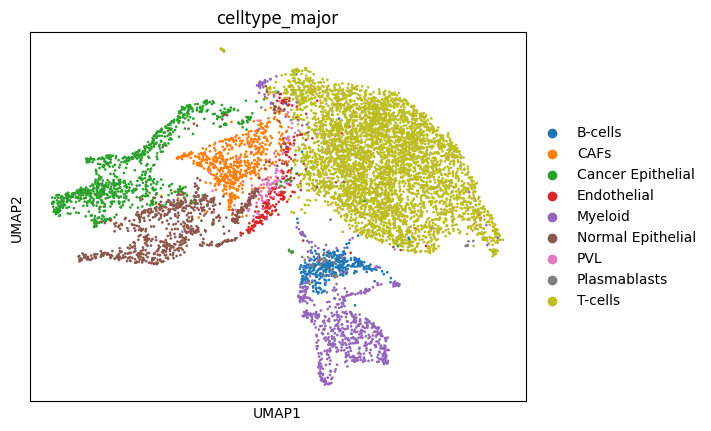

In [116]:
sc.pl.umap(adata_count_matrix_t, color='celltype_major') # this checks out

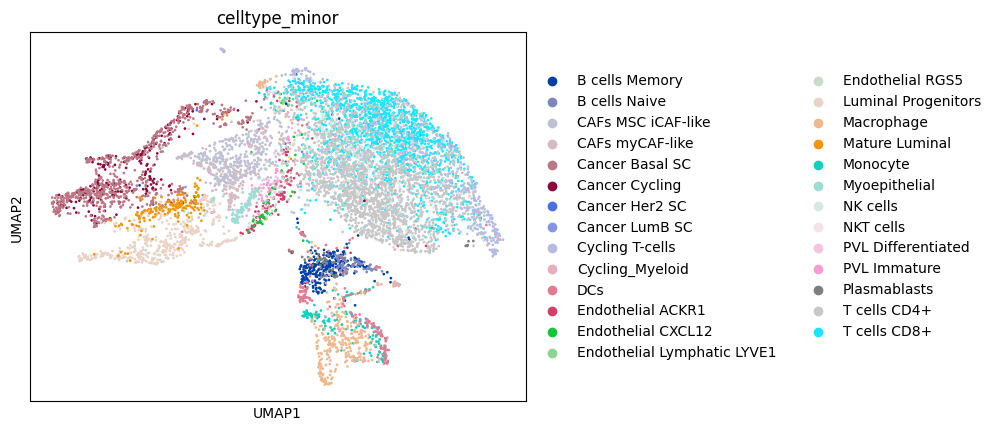

In [122]:
sc.pl.umap(adata_count_matrix_t, color='celltype_minor')

In [100]:
adata_count_matrix

AnnData object with n_obs × n_vars = 29733 × 7986
    obs: 'barcode'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [57]:
count_matrix_barcodes = pd.read_csv("/Users/nicholasdjedjos/Documents/stat_ml_for_genomics/Mapping-scRNA-seq-Variability-Using-Co-Embedding-to-Understand-Cell-Neighborhood-Effects/starfysh_reproducibility-main/data/CID44971_TNBC/scrna/count_matrix_barcodes.tsv", header=None)  

In [58]:
count_matrix_barcodes

,0
0,CID44971_AAGCCGCCACGCATCG
1,CID44971_AAGGAGCTCAACACAC
2,CID44971_ACGAGCCTCCGATATG
3,CID44971_ACGTCAATCCGAAGAG
4,CID44971_AGAGTGGCACACGCTG
...,...
7981,CID44971_TTGACTTTCTCTTATG
7982,CID44971_TTGGCAAGTTCGTCTC
7983,CID44971_TTTATGCTCAGATAAG
7984,CID44971_TTTCCTCCAAGCCATT


In [59]:
adata_count_matrix

AnnData object with n_obs × n_vars = 29733 × 7986
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [69]:
total_cells = 0
for idx, val in enumerate(members_synth.columns):
    if idx > 0:
        total_cells += sum(members_synth[f'{val}'])
      

In [70]:
print(total_cells) # of cells from the simulated data in the spots

24576


In [ ]:
# why is number of cells in simulated data in spots different than the number of cells in real data?

In [73]:
members_synth.index = members_synth.iloc[:,0]

In [76]:
members_synth = members_synth.iloc[:, 1:]

In [77]:
members_synth

,CAFs,Cancer Epithelial,Myeloid,Normal Epithelial,T-cells
Unnamed: 0,,,,,
exper0_location_0,3,0,0,2,0
exper0_location_1,3,0,0,0,3
exper0_location_2,1,0,0,0,6
exper0_location_3,0,0,0,0,8
exper0_location_4,0,0,0,0,7
...,...,...,...,...,...
exper0_location_2495,0,0,0,2,7
exper0_location_2496,0,0,0,5,5
exper0_location_2497,0,0,0,5,4


In [78]:
sc.pp.pca(members_synth)

array([[-3.4779227 ,  0.44918504, -1.4893233 , -3.0087323 ],
       [-3.5551116 , -2.6436296 , -2.288028  , -1.4885156 ],
       [-3.7342305 , -3.7746751 , -3.3395495 ,  1.7423221 ],
       ...,
       [-4.131688  ,  1.6456552 , -3.6084783 ,  2.2493591 ],
       [-4.143565  , -1.880484  , -2.8677611 ,  3.1628292 ],
       [-3.761181  , -4.121925  , -3.6478193 ,  3.021221  ]],
      dtype=float32)

In [81]:
from anndata import AnnData
members_synth_adata = AnnData(members_synth)

In [83]:
sc.pp.pca(members_synth_adata)

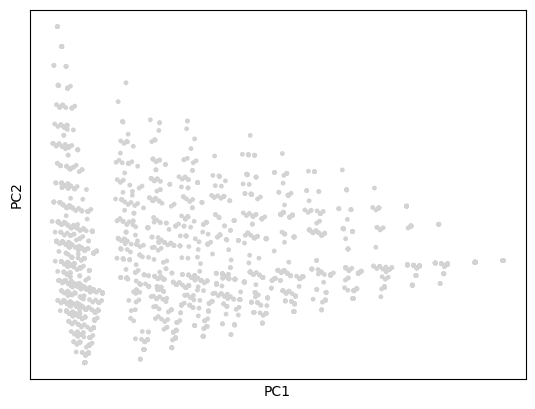

In [84]:
sc.pl.pca(members_synth_adata)

In [86]:
sc.pp.neighbors(members_synth_adata)

/Users/nicholasdjedjos/miniconda3/envs/simulation/lib/python3.9/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [87]:
sc.tl.umap(members_synth_adata)

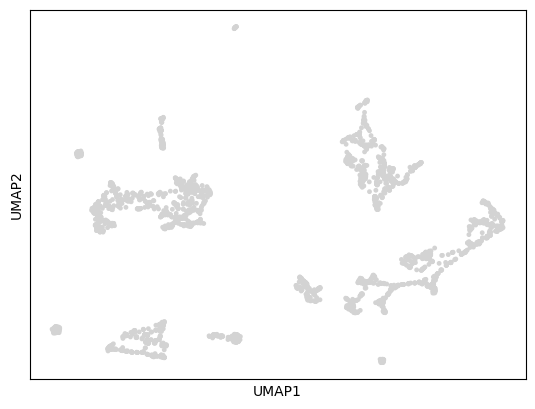

In [88]:
sc.pl.umap(members_synth_adata)

In [89]:
sc.pp.pca(adata_h5ad)

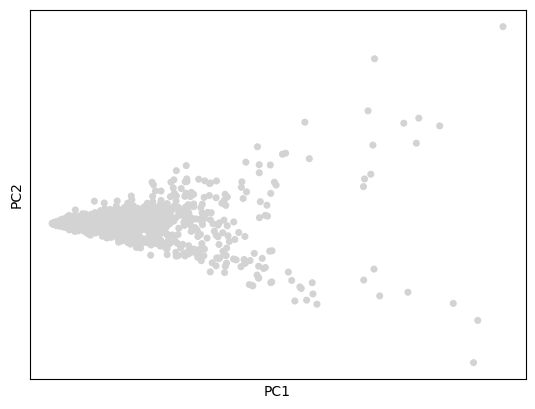

In [90]:
sc.pl.pca(adata_h5ad)

In [91]:
sc.pp.neighbors(adata_h5ad)

In [92]:
sc.tl.umap(adata_h5ad)

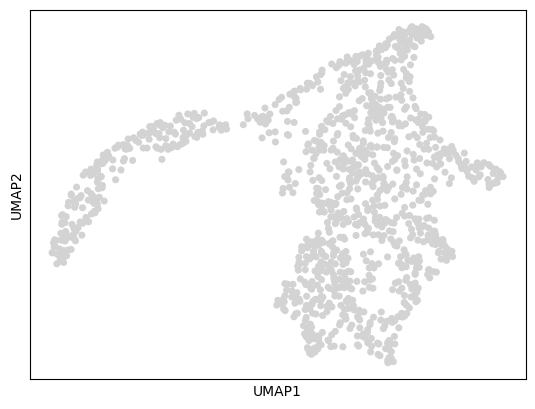

In [93]:
sc.pl.umap(adata_h5ad)

In [94]:
adata_h5ad # doesn't add up to cells used in the count_matrix_sparse

AnnData object with n_obs × n_vars = 1162 × 19237
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA'
    var: '_index', 'features'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'